In [121]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [127]:
# Load your dataset (replace 'your_data.csv' with the actual file path)
df = pd.read_csv("Data/final_data.csv", index_col=0)
df.sort_values(by=['game_id'], ascending=False, inplace=True)
df

,game_id,season,week,team,opponent,score,home,ewma_dynamic_window_rushing_offense_team,ewma_dynamic_window_passing_offense_team,ewma_dynamic_window_rushing_defense_team,...,team_id,rest_differential,windy,div_game,spread_line,total_line,game_type,location,total,implied_points
1739,2023_02_WAS_DEN,2023,2,WAS,DEN,35,0,-0.097505,-0.173446,-0.192871,...,2023_02_WAS_DEN_A,0,0,0,-4.0,38.5,REG,Home,68.0,21.25
1738,2023_02_WAS_DEN,2023,2,DEN,WAS,33,1,-0.026010,-0.099025,-0.163069,...,2023_02_WAS_DEN_H,0,0,0,4.0,38.5,REG,Home,68.0,17.25
1737,2023_02_SF_LA,2023,2,SF,LA,30,0,-0.080715,0.173539,-0.066290,...,2023_02_SF_LA_A,0,0,1,7.5,45.0,REG,Home,53.0,18.75
1736,2023_02_SF_LA,2023,2,LA,SF,23,1,0.015740,-0.019191,-0.010298,...,2023_02_SF_LA_H,0,0,1,-7.5,45.0,REG,Home,53.0,26.25
1735,2023_02_SEA_DET,2023,2,SEA,DET,37,0,-0.026022,-0.081137,0.010985,...,2023_02_SEA_DET_A,-3,0,0,-4.5,47.5,REG,Home,68.0,26.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2020_01_CLE_BAL,2020,1,CLE,BAL,6,0,NaN,NaN,NaN,...,2020_01_CLE_BAL_A,0,0,1,-7.0,47.0,REG,Home,44.0,27.00
2,2020_01_CHI_DET,2020,1,DET,CHI,23,1,NaN,NaN,NaN,...,2020_01_CHI_DET_H,0,0,1,2.5,42.5,REG,Home,50.0,20.00
3,2020_01_CHI_DET,2020,1,CHI,DET,27,0,NaN,NaN,NaN,...,2020_01_CHI_DET_A,0,0,1,-2.5,42.5,REG,Home,50.0,22.50
1,2020_01_ARI_SF,2020,1,ARI,SF,24,0,NaN,NaN,NaN,...,2020_01_ARI_SF_A,0,0,1,-7.0,48.5,REG,Home,44.0,27.75


In [70]:
data = df.loc[df['season'] < 2023].sort_values(by=['game_id'], ascending = False)
data = data[['score', 'ewma_dynamic_window_rushing_offense_team',
       'ewma_dynamic_window_passing_offense_team',
       'ewma_dynamic_window_rushing_defense_opp',
       'ewma_dynamic_window_passing_defense_opp',
       'home', 'rest_differential', 'windy', 'div_game']]

data = data.dropna(inplace=False)

In [71]:
# Split the data into features (X) and target (y)
X = data.drop(columns=['score'])  # Replace 'target_column' with the actual target column name
y = data['score']

In [72]:
# Standardize the features (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [73]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(1252, 8) (314, 8)


In [74]:
# Build the neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

In [75]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [76]:
# Train the model on the training data
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
40/40 [==============================] - 0s 639us/step - loss: 604.6030
Epoch 2/100
40/40 [==============================] - 0s 690us/step - loss: 536.8068
Epoch 3/100
40/40 [==============================] - 0s 639us/step - loss: 431.6140
Epoch 4/100
40/40 [==============================] - 0s 614us/step - loss: 296.7311
Epoch 5/100
40/40 [==============================] - 0s 614us/step - loss: 178.1519
Epoch 6/100
40/40 [==============================] - 0s 614us/step - loss: 122.6125
Epoch 7/100
40/40 [==============================] - 0s 639us/step - loss: 110.5032
Epoch 8/100
40/40 [==============================] - 0s 614us/step - loss: 107.3059
Epoch 9/100
40/40 [==============================] - 0s 639us/step - loss: 105.4208
Epoch 10/100
40/40 [==============================] - 0s 639us/step - loss: 103.9335
Epoch 11/100
40/40 [==============================] - 0s 614us/step - loss: 102.4551
Epoch 12/100
40/40 [==============================] - 0s 614us/step - loss

In [77]:
# Evaluate the model on the testing data
train_loss = model.evaluate(X_train, y_train, verbose=0)
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error on Train Data: {train_loss}')
print(f'Mean Squared Error on Test Data: {loss}')

Mean Squared Error on Train Data: 85.5329360961914
Mean Squared Error on Test Data: 81.97628021240234


In [78]:
# Make predictions
predictions = model.predict(X_test)

10/10 [==============================] - 0s 554us/step


In [79]:
# Creating a df with the actual scores to merge back with the other data on index
frame = {'actual_score': y_test}
actuals = pd.DataFrame(frame)
actuals

,actual_score
1122,21
1378,20
77,21
395,31
1591,24
...,...
653,14
483,27
1167,20
1590,30


In [80]:
merge_df = df[['game_id', 'season', 'week', 'team', 'opponent', 'spread_line', 'total_line', 'score', 'implied_points',]]
results = actuals.merge(merge_df, left_index = True, right_index = True)
results

,actual_score,game_id,season,week,team,opponent,spread_line,total_line,score,implied_points
1122,21,2022_01_KC_ARI,2022,1,ARI,KC,-6.0,54.0,21,30.00
1378,20,2022_09_TEN_KC,2022,9,KC,TEN,14.0,45.0,20,15.50
77,21,2020_03_HOU_PIT,2020,3,HOU,PIT,-4.0,46.5,21,25.25
395,31,2020_14_GB_DET,2020,14,GB,DET,9.5,55.5,31,23.00
1591,24,2022_17_CAR_TB,2022,17,CAR,TB,-3.5,40.5,24,22.00
...,...,...,...,...,...,...,...,...,...,...
653,14,2021_04_LV_LAC,2021,4,LV,LAC,-3.0,52.0,14,27.50
483,27,2020_17_ATL_TB,2020,17,ATL,TB,-7.5,51.0,27,29.25
1167,20,2022_02_TB_NO,2022,2,TB,NO,2.5,44.0,20,20.75
1590,30,2022_17_CAR_TB,2022,17,TB,CAR,3.5,40.5,30,18.50


In [81]:
# Okay now adding in the predictions
results['prediction'] = predictions
results

,actual_score,game_id,season,week,team,opponent,spread_line,total_line,score,implied_points,prediction
1122,21,2022_01_KC_ARI,2022,1,ARI,KC,-6.0,54.0,21,30.00,22.569063
1378,20,2022_09_TEN_KC,2022,9,KC,TEN,14.0,45.0,20,15.50,30.786448
77,21,2020_03_HOU_PIT,2020,3,HOU,PIT,-4.0,46.5,21,25.25,21.961105
395,31,2020_14_GB_DET,2020,14,GB,DET,9.5,55.5,31,23.00,29.937767
1591,24,2022_17_CAR_TB,2022,17,CAR,TB,-3.5,40.5,24,22.00,19.256899
...,...,...,...,...,...,...,...,...,...,...,...
653,14,2021_04_LV_LAC,2021,4,LV,LAC,-3.0,52.0,14,27.50,24.383415
483,27,2020_17_ATL_TB,2020,17,ATL,TB,-7.5,51.0,27,29.25,20.067432
1167,20,2022_02_TB_NO,2022,2,TB,NO,2.5,44.0,20,20.75,20.135197
1590,30,2022_17_CAR_TB,2022,17,TB,CAR,3.5,40.5,30,18.50,22.820534


In [82]:
# Comparing the errors
mse_vegas =  mean_squared_error(results.score, results.implied_points)
mse_model =  mean_squared_error(results.score, results.prediction)
print(f'Mean Squared Error - Vegas: {mse_vegas}')
print(f'Mean Squared Error - Model: {mse_model}')

Mean Squared Error - Vegas: 120.62619426751593
Mean Squared Error - Model: 81.97627654161258


10/10 [==============================] - 0s 557us/step


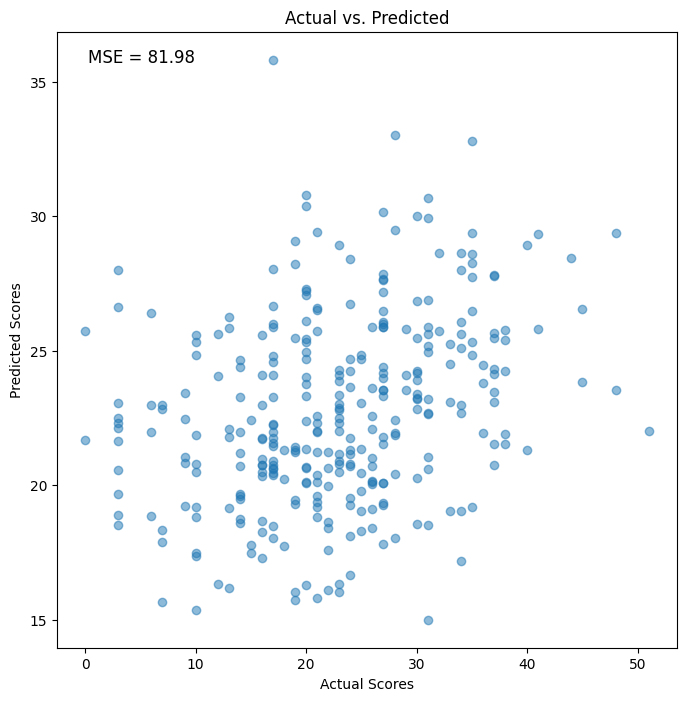

In [83]:
# Plotting results
import matplotlib.pyplot as plt

# Assuming you have trained the model and have predictions stored in 'y_pred'
y_pred = model.predict(X_test)

# Plotting actual vs. predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')

# Add MSE as an annotation
plt.annotate(f'MSE = {mse_model:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.show()


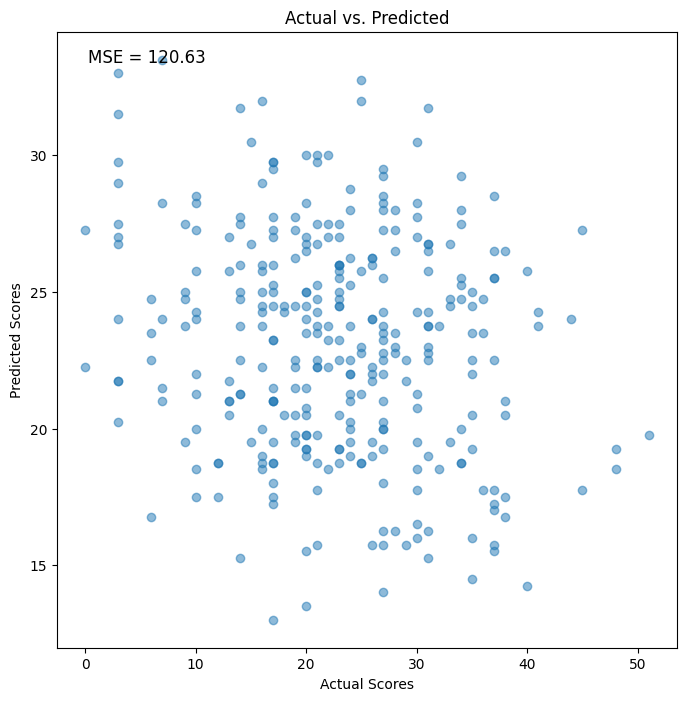

In [84]:
# Plotting results - Vegas
import matplotlib.pyplot as plt

# Getting implied points from above
vegas = results.implied_points

# Plotting actual vs. predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, vegas, alpha=0.5)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')

# Add MSE as an annotation
plt.annotate(f'MSE = {mse_vegas:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.show()

In [90]:
# Testing the 2023 season

current_season_test = df.loc[df['season'] == 2023].sort_values(by=['game_id'], ascending = False)
current_season_test = current_season_test[['ewma_dynamic_window_rushing_offense_team',
       'ewma_dynamic_window_passing_offense_team',
       'ewma_dynamic_window_rushing_defense_opp',
       'ewma_dynamic_window_passing_defense_opp',
       'home', 'rest_differential', 'windy', 'div_game']]

current_season_test = current_season_test.dropna(inplace=False)

In [98]:
predictions = model.predict(current_season_test)

2/2 [==============================] - 0s 998us/step


In [118]:
results = df.loc[df['season'] == 2023].sort_values(by=['game_id'], ascending = False)
# results = results[['game_id, season, week, team, opponent, score, home, spread_line, total_line, total, implied_points']]
results['prediction'] = predictions
results['actual'] = results.score
results.drop(columns=['ewma_dynamic_window_rushing_offense_team',
       'ewma_dynamic_window_passing_offense_team',
       'ewma_dynamic_window_rushing_defense_team',
       'ewma_dynamic_window_passing_defense_team',
       'ewma_dynamic_window_rushing_offense_opp',
       'ewma_dynamic_window_passing_offense_opp',
       'ewma_dynamic_window_rushing_defense_opp',
       'ewma_dynamic_window_passing_defense_opp', 'team_id','score'], inplace = True)
results

,game_id,season,week,team,opponent,home,rest_differential,windy,div_game,spread_line,total_line,game_type,location,total,implied_points,prediction,actual
1739,2023_02_WAS_DEN,2023,2,WAS,DEN,0,0,0,0,-4.0,38.5,REG,Home,68.0,21.25,15.989926,35
1738,2023_02_WAS_DEN,2023,2,DEN,WAS,1,0,0,0,4.0,38.5,REG,Home,68.0,17.25,18.982325,33
1737,2023_02_SF_LA,2023,2,SF,LA,0,0,0,1,7.5,45.0,REG,Home,53.0,18.75,18.459591,30
1736,2023_02_SF_LA,2023,2,LA,SF,1,0,0,1,-7.5,45.0,REG,Home,53.0,26.25,20.400700,23
1735,2023_02_SEA_DET,2023,2,SEA,DET,0,-3,0,0,-4.5,47.5,REG,Home,68.0,26.00,17.212141,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,2023_01_CAR_ATL,2023,1,ATL,CAR,1,0,0,1,3.5,40.5,REG,Home,34.0,18.50,20.599279,24
1678,2023_01_BUF_NYJ,2023,1,NYJ,BUF,1,0,0,1,-2.5,44.5,REG,Home,38.0,23.50,20.137114,22
1679,2023_01_BUF_NYJ,2023,1,BUF,NYJ,0,0,0,1,2.5,44.5,REG,Home,38.0,21.00,17.696898,16
1677,2023_01_ARI_WAS,2023,1,ARI,WAS,0,0,0,0,-7.0,38.0,REG,Home,36.0,22.50,15.315126,16


In [119]:
# Comparing the errors
mse_vegas =  mean_squared_error(results.actual, results.implied_points)
mse_model =  mean_squared_error(results.actual, results.prediction)
print(f'Mean Squared Error - Vegas: {mse_vegas}')
print(f'Mean Squared Error - Model: {mse_model}')

Mean Squared Error - Vegas: 96.74609375
Mean Squared Error - Model: 99.27560884193447
